In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Load the data, dataset (1) - BTC/USD from Kraken
btc_usdt = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\L3\\XBTUSDT.csv", names=['UNIX_time', 'price', 'volume'])
btc_usdt.head()

UNIX_time    price    volume
0  1688169604  30474.1  0.018800
1  1688169604  30474.8  0.000103
2  1688169604  30476.5  0.014997
3  1688169656  30483.5  0.000614
4  1688170008  30479.0  0.000328

In [3]:
# Convert the UNIX timestamp to human readable datetime. Check the argument unit='s' to make sure the timestamp is in seconds.
btc_usdt['timestamp'] = pd.to_datetime(btc_usdt['UNIX_time'], unit='s')
btc_usdt.set_index('timestamp', inplace=True) # Set the timestamp as the index
btc_usdt.head()

UNIX_time    price    volume
timestamp                                         
2023-07-01 00:00:04  1688169604  30474.1  0.018800
2023-07-01 00:00:04  1688169604  30474.8  0.000103
2023-07-01 00:00:04  1688169604  30476.5  0.014997
2023-07-01 00:00:56  1688169656  30483.5  0.000614
2023-07-01 00:06:48  1688170008  30479.0  0.000328

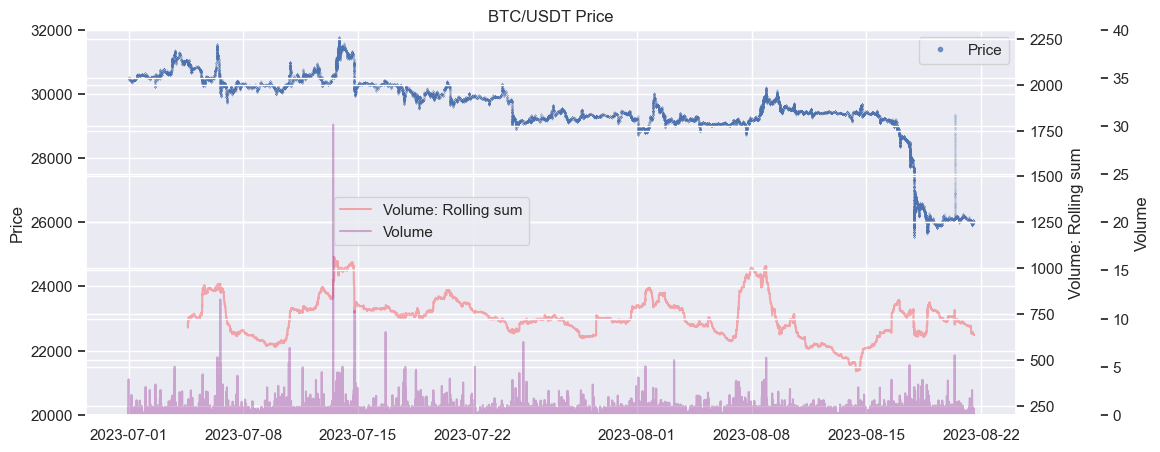

In [4]:
#Figure 1
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(btc_usdt.index, btc_usdt['price'], s = 0.001, alpha=0.4)
ax.set_ylabel('Price')
ax.set_title('BTC/USDT Price')
ax.set_ylim(20000, 32000)

custom_legend = plt.Line2D([0], [0], linestyle="none", marker='o', color='b', markersize=3, alpha = 0.7, label='Price') # Creating a custom legend
ax.legend(handles=[custom_legend], loc='upper right')

ax2 = ax.twinx() # Create a second y-axis
ax2.plot(btc_usdt.index, btc_usdt['volume'].rolling(10000).sum(), color='red', label='Volume: Rolling sum', alpha=0.3)
ax2.set_ylabel('Volume: Rolling sum')
ax2.set_ylim(200, 2300)

ax3 = ax.twinx() # Create a third y-axis
ax3.plot(btc_usdt.index, btc_usdt['volume'], color='purple', label='Volume', alpha=0.3)
ax3.set_ylabel('Volume')
ax3.set_ylim(0, 40)
ax3.spines['right'].set_position(('outward', 60))

fig.legend(bbox_to_anchor=(0.5,0.56)) # Adjust the legend position
plt.show()

In [5]:
between_trades_interval = btc_usdt['UNIX_time'].diff().dropna() # Calculate the trade duration
print("Summary Statistics \n\n", between_trades_interval.describe(), "\n\n") # Get the summary statistics of the trade duration
print("10 Largest trade durations \n\n", between_trades_interval.sort_values(ascending=False).head(10)) # Get the top 10 largest durations between trades

Summary Statistics 

 count    185042.000000
mean         24.072584
std          61.776399
min           0.000000
25%           0.000000
50%           0.000000
75%          18.000000
max        2195.000000
Name: UNIX_time, dtype: float64 


10 Largest trade durations 

 timestamp
2023-08-01 15:41:45    2195.0
2023-07-12 09:19:13    2001.0
2023-08-17 10:30:32    1809.0
2023-08-18 15:05:14    1576.0
2023-07-23 07:29:23    1281.0
2023-07-23 02:13:51    1244.0
2023-08-06 03:40:46    1224.0
2023-07-20 23:44:23    1125.0
2023-07-16 03:52:08    1113.0
2023-07-19 05:28:45    1100.0
Name: UNIX_time, dtype: float64


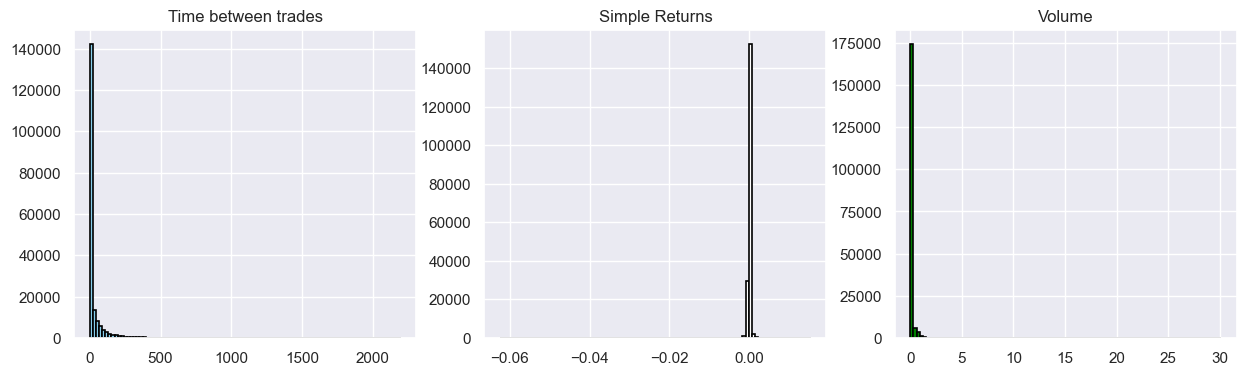

In [6]:
#Figure 2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.hist(between_trades_interval, bins=100, color='skyblue', edgecolor='black', linewidth=1.2)
ax1.set_title("Time between trades")
ax2.hist(btc_usdt['price'].pct_change().dropna(), bins=100, color='white', edgecolor='black', linewidth=1.2)
ax2.set_title("Simple Returns")
ax3.hist(btc_usdt['volume'], bins=100, color='green', edgecolor='black', linewidth=1.2)
ax3.set_title("Volume")
plt.show()

In [7]:
boolean_array_is_duplicate = btc_usdt['UNIX_time'].duplicated(keep=False) # Check for duplicates
sum_of_duplicates = boolean_array_is_duplicate.sum() # Sum the duplicates
print("The number of trades that occured at the same second with at least one more trade, is: ",sum_of_duplicates)
print("The percentage of these trades to the number of all trades, is: ",round(sum_of_duplicates / len(btc_usdt) * 100, 2), "%")
print("The percentage of the volume of these trades to the entire volume, is: ",round(((boolean_array_is_duplicate * btc_usdt['volume']).sum() / btc_usdt['volume'].sum() )* 100, 2), "%")

The number of trades that occured at the same second with at least one more trade, is:  126239
The percentage of these trades to the number of all trades, is:  68.22 %
The percentage of the volume of these trades to the entire volume, is:  91.13 %


C:\Users\DELL\AppData\Local\Temp\ipykernel_19472\2642210345.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ax2.hist(aggr_dataset_1['price'].pct_change().dropna(),bins=100, color='white', edgecolor='black', linewidth=1.2)


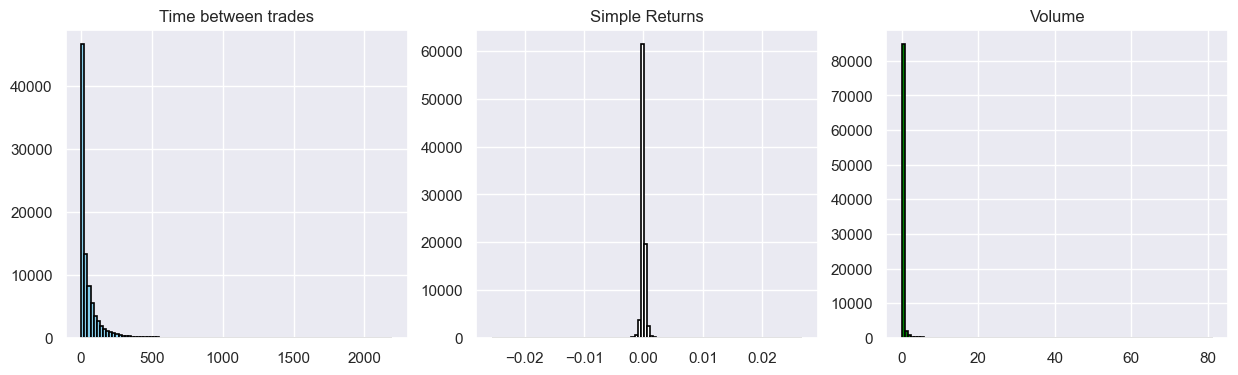

In [8]:
# Figure 3
aggr_dataset_1 = pd.DataFrame()
aggr_dataset_1['UNIX_time'] = btc_usdt['UNIX_time'].groupby(btc_usdt['UNIX_time']).first() # Group the UNIX timestamp by the first timestamp
aggr_dataset_1['volume'] = btc_usdt['volume'].groupby(btc_usdt['UNIX_time']).sum() # Aggregate the volume by the UNIX timestamp
aggr_dataset_1['price'] = (btc_usdt['price'] * btc_usdt['volume']).groupby(btc_usdt['UNIX_time']).sum() / aggr_dataset_1['volume'] # Final price as VWAP of the split transaction
aggr_dataset_1.index = btc_usdt.index.drop_duplicates() # Drop the duplicates from the index

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.hist(aggr_dataset_1['UNIX_time'].diff().dropna(), bins=100, color='skyblue', edgecolor='black', linewidth=1.2)
ax1.set_title("Time between trades")
ax2.hist(aggr_dataset_1['price'].pct_change().dropna(),bins=100, color='white', edgecolor='black', linewidth=1.2)
ax2.set_title("Simple Returns")
ax3.hist(aggr_dataset_1['volume'], bins=100, color='green', edgecolor='black', linewidth=1.2)
ax3.set_title("Volume")
plt.show()

In [12]:
import glob

# Load the data, dataset (2) - RVN/USDT
list_of_files = glob.glob("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\L3\\RVNUSDT-trades-2023-04.csv") # List the RVNUSDT files in the directory
column_names = ['id', 'price', 'qty', 'base_qty', 'UNIX_time', 'is_buyer_maker', 'is_best_match'] # Column names
rvn_usdt = pd.concat([pd.read_csv(file, names=column_names) for file in list_of_files], ignore_index=True, axis = 0) # Concatenate the files
rvn_usdt.sort_values('UNIX_time', inplace=True) # Sort the values by time
rvn_usdt.head(5)

print("Number of duplicate entries: ", rvn_usdt['id'].duplicated().sum()) # Check for duplicates
print("Number of entries that were not executed at the best possible price: ",  (~(rvn_usdt['is_best_match'].astype("bool"))).sum()) # Check for best match
print("Can the base_qty be derived from the qty and price?: ", np.isclose(rvn_usdt['price'] * rvn_usdt['qty'], rvn_usdt['base_qty'], atol=1e-05).all()) # Check if the base quantity can be derived from the quantity
print("Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' \n\n")

rvn_usdt = rvn_usdt.drop(columns=['id', 'is_best_match', 'base_qty']) # Drop the unnecessary columns
rvn_usdt['timestamp'] = pd.to_datetime(rvn_usdt['UNIX_time'], unit='ms') # Convert the UNIX timestamp to human readable datetime. Check the argument unit='ms' to make sure the timestamp is in milliseconds.
rvn_usdt.set_index('timestamp', inplace=True) # Set the timestamp as the index
rvn_usdt.head()

Number of duplicate entries:  0
Number of entries that were not executed at the best possible price:  0
Can the base_qty be derived from the qty and price?:  True
Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' 




price     qty      UNIX_time  is_buyer_maker
timestamp                                                              
2023-04-01 00:00:15.745  0.02588   424.9  1680307215745           False
2023-04-01 00:00:15.759  0.02588  3313.5  1680307215759           False
2023-04-01 00:00:15.759  0.02588  4172.5  1680307215759           False
2023-04-01 00:00:15.762  0.02588  5162.5  1680307215762           False
2023-04-01 00:00:15.762  0.02588  1041.3  1680307215762           False

In [13]:
import glob

# Load the data, dataset (2) - RVN/USDT
list_of_files = glob.glob("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\L3\\RVNUSDT-trades-2023-05.csv") # List the RVNUSDT files in the directory
column_names = ['id', 'price', 'qty', 'base_qty', 'UNIX_time', 'is_buyer_maker', 'is_best_match'] # Column names
rvn_usdt = pd.concat([pd.read_csv(file, names=column_names) for file in list_of_files], ignore_index=True, axis = 0) # Concatenate the files
rvn_usdt.sort_values('UNIX_time', inplace=True) # Sort the values by time
rvn_usdt.head(5)

print("Number of duplicate entries: ", rvn_usdt['id'].duplicated().sum()) # Check for duplicates
print("Number of entries that were not executed at the best possible price: ",  (~(rvn_usdt['is_best_match'].astype("bool"))).sum()) # Check for best match
print("Can the base_qty be derived from the qty and price?: ", np.isclose(rvn_usdt['price'] * rvn_usdt['qty'], rvn_usdt['base_qty'], atol=1e-05).all()) # Check if the base quantity can be derived from the quantity
print("Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' \n\n")

rvn_usdt = rvn_usdt.drop(columns=['id', 'is_best_match', 'base_qty']) # Drop the unnecessary columns
rvn_usdt['timestamp'] = pd.to_datetime(rvn_usdt['UNIX_time'], unit='ms') # Convert the UNIX timestamp to human readable datetime. Check the argument unit='ms' to make sure the timestamp is in milliseconds.
rvn_usdt.set_index('timestamp', inplace=True) # Set the timestamp as the index
rvn_usdt.head()

Number of duplicate entries:  0
Number of entries that were not executed at the best possible price:  0
Can the base_qty be derived from the qty and price?:  True
Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' 




price      qty     UNIX_time is_buyer_maker
timestamp                                                             
2023-05-01 00:00:00.578  0.02379   7408.1  1.682899e+12          False
2023-05-01 00:00:00.578  0.02379  14593.5  1.682899e+12          False
2023-05-01 00:00:11.399  0.02379   9338.4  1.682899e+12           True
2023-05-01 00:00:11.399  0.02379   7408.1  1.682899e+12           True
2023-05-01 00:00:13.017  0.02379   1996.5  1.682899e+12          False

In [14]:
import glob

# Load the data, dataset (2) - RVN/USDT
list_of_files = glob.glob("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\L3\\RVNUSDT-trades-2023-06.csv") # List the RVNUSDT files in the directory
column_names = ['id', 'price', 'qty', 'base_qty', 'UNIX_time', 'is_buyer_maker', 'is_best_match'] # Column names
rvn_usdt = pd.concat([pd.read_csv(file, names=column_names) for file in list_of_files], ignore_index=True, axis = 0) # Concatenate the files
rvn_usdt.sort_values('UNIX_time', inplace=True) # Sort the values by time
rvn_usdt.head(5)

print("Number of duplicate entries: ", rvn_usdt['id'].duplicated().sum()) # Check for duplicates
print("Number of entries that were not executed at the best possible price: ",  (~(rvn_usdt['is_best_match'].astype("bool"))).sum()) # Check for best match
print("Can the base_qty be derived from the qty and price?: ", np.isclose(rvn_usdt['price'] * rvn_usdt['qty'], rvn_usdt['base_qty'], atol=1e-05).all()) # Check if the base quantity can be derived from the quantity
print("Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' \n\n")

rvn_usdt = rvn_usdt.drop(columns=['id', 'is_best_match', 'base_qty']) # Drop the unnecessary columns
rvn_usdt['timestamp'] = pd.to_datetime(rvn_usdt['UNIX_time'], unit='ms') # Convert the UNIX timestamp to human readable datetime. Check the argument unit='ms' to make sure the timestamp is in milliseconds.
rvn_usdt.set_index('timestamp', inplace=True) # Set the timestamp as the index
rvn_usdt.head()

Number of duplicate entries:  0
Number of entries that were not executed at the best possible price:  0
Can the base_qty be derived from the qty and price?:  False
Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' 




price      qty     UNIX_time is_buyer_maker
timestamp                                                             
2023-06-01 00:00:42.862  0.02067  13128.6  1.685578e+12           True
2023-06-01 00:00:44.613  0.02066    711.5  1.685578e+12           True
2023-06-01 00:00:44.613  0.02066   2173.9  1.685578e+12           True
2023-06-01 00:00:44.613  0.02066   2923.3  1.685578e+12           True
2023-06-01 00:00:44.613  0.02066   2054.5  1.685578e+12           True

In [15]:
import glob

# Load the data, dataset (2) - RVN/USDT
list_of_files = glob.glob("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\L3\\RVNUSDT-trades-2023-07.csv") # List the RVNUSDT files in the directory
column_names = ['id', 'price', 'qty', 'base_qty', 'UNIX_time', 'is_buyer_maker', 'is_best_match'] # Column names
rvn_usdt = pd.concat([pd.read_csv(file, names=column_names) for file in list_of_files], ignore_index=True, axis = 0) # Concatenate the files
rvn_usdt.sort_values('UNIX_time', inplace=True) # Sort the values by time
rvn_usdt.head(5)

print("Number of duplicate entries: ", rvn_usdt['id'].duplicated().sum()) # Check for duplicates
print("Number of entries that were not executed at the best possible price: ",  (~(rvn_usdt['is_best_match'].astype("bool"))).sum()) # Check for best match
print("Can the base_qty be derived from the qty and price?: ", np.isclose(rvn_usdt['price'] * rvn_usdt['qty'], rvn_usdt['base_qty'], atol=1e-05).all()) # Check if the base quantity can be derived from the quantity
print("Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' \n\n")

rvn_usdt = rvn_usdt.drop(columns=['id', 'is_best_match', 'base_qty']) # Drop the unnecessary columns
rvn_usdt['timestamp'] = pd.to_datetime(rvn_usdt['UNIX_time'], unit='ms') # Convert the UNIX timestamp to human readable datetime. Check the argument unit='ms' to make sure the timestamp is in milliseconds.
rvn_usdt.set_index('timestamp', inplace=True) # Set the timestamp as the index
rvn_usdt.head()

Number of duplicate entries:  0
Number of entries that were not executed at the best possible price:  0
Can the base_qty be derived from the qty and price?:  True
Due to the results above, we can drop the columns 'id', 'is_best_match' and 'base_qty' 




price      qty      UNIX_time is_buyer_maker
timestamp                                                              
1970-01-01 00:00:16.881  0.02103  10000.0          16881            NaN
2023-07-01 00:00:11.321  0.02003  10000.0  1688169611321          False
2023-07-01 00:00:11.324  0.02003      0.2  1688169611324          False
2023-07-01 00:00:11.324  0.02003   4347.2  1688169611324          False
2023-07-01 00:00:11.324  0.02003   4347.2  1688169611324          False

The buying volume is:  256267010.99999997
The selling volume is:  247386771.3


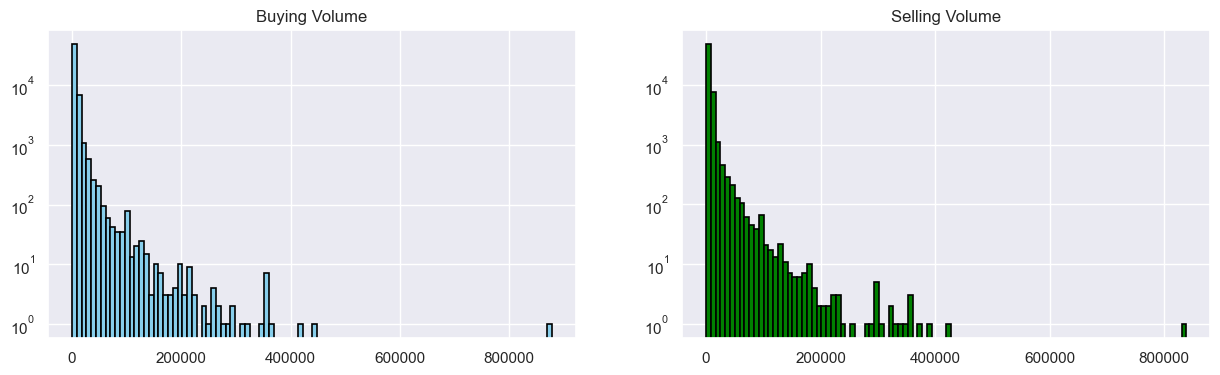

In [16]:
# Figure 4
buying_volume = rvn_usdt['qty'] * (~(rvn_usdt['is_buyer_maker'].astype("bool"))) # An array that contains the buying volume
selling_volume = rvn_usdt['qty'] * rvn_usdt['is_buyer_maker'].astype("bool") # An array that contains the selling volume

print("The buying volume is: ", buying_volume.sum()) # Calculate the buying volume
print("The selling volume is: ", selling_volume.sum()) # Calculate the selling volume

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.hist(buying_volume, log = True, bins=100, color='skyblue', edgecolor='black', linewidth=1.2)
ax1.set_title("Buying Volume")
ax2.hist(selling_volume, log = True, bins=100, color='green', edgecolor='black', linewidth=1.2)
ax2.set_title("Selling Volume")
plt.show()

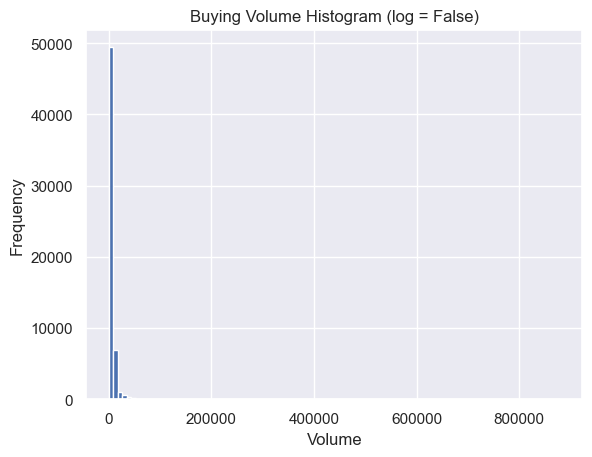

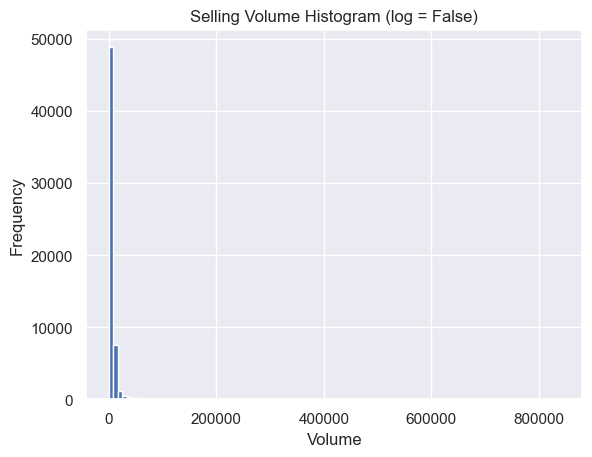

'Exercise 2\n\nCalculate the tick size for datasets (1) and (2). Explain your methodology in the forum.\n\nWe will now plot the buying and selling volume in a visually pleasing way. When plotting \nhigh resolution data, it makes no sense to zoom out in order to see the "big picture." On the contrary, \nwe opt for zoomed-in graphs or interactive plots (plotly, bokeh) where we can zoom in on demand.'

In [ ]:
'''Exercise 1

In the histogram above, we have used the argument log = True in order to transform the 
 axis in log scale. To see why, plot the histograms of the buying and selling volume with log = False. 
 Furthermore, let's distinguish between transforming the 
 axis for visualization purposes and transforming the data itself, using the natural logarithm. 
 Create the two histograms again with log = False, but use the np.log function to transform the 
 buying and selling volume: np.log(buying_volume[buying_volume > 1]). Do the same for the histograms 
 presented in Figure 3. Explain the differences.'''

import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.hist(buying_volume, bins=100)
plt.title("Buying Volume Histogram (log = False)")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(selling_volume, bins=100)
plt.title("Selling Volume Histogram (log = False)")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()



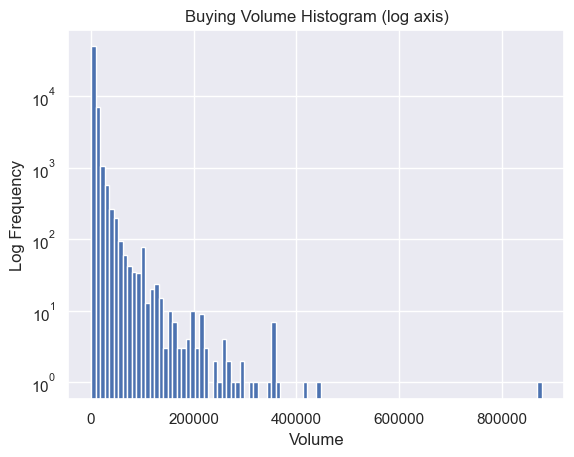

In [18]:
'''Exercise 2

Calculate the tick size for datasets (1) and (2). Explain your methodology in the forum.

We will now plot the buying and selling volume in a visually pleasing way. When plotting 
high resolution data, it makes no sense to zoom out in order to see the "big picture." On the contrary, 
we opt for zoomed-in graphs or interactive plots (plotly, bokeh) where we can zoom in on demand.'''

plt.figure()
plt.hist(buying_volume, bins=100, log=True)
plt.title("Buying Volume Histogram (log axis)")
plt.xlabel("Volume")
plt.ylabel("Log Frequency")
plt.show()


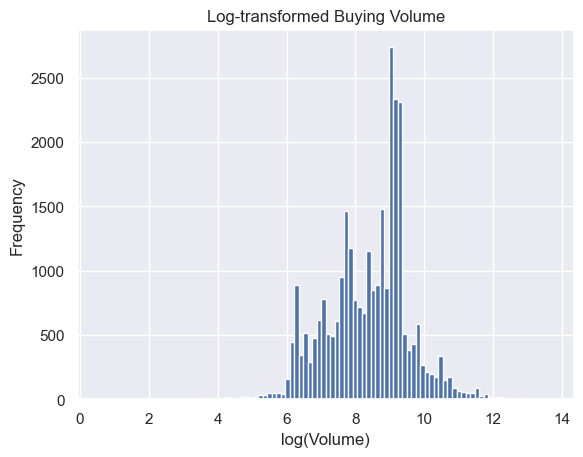

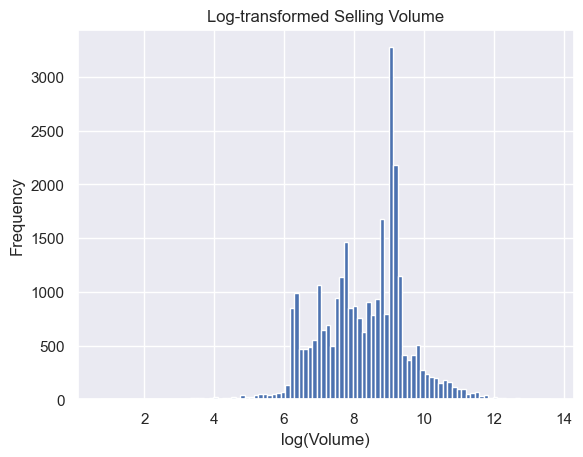

In [19]:
log_buy = np.log(buying_volume[buying_volume > 1])
log_sell = np.log(selling_volume[selling_volume > 1])

plt.figure()
plt.hist(log_buy, bins=100)
plt.title("Log-transformed Buying Volume")
plt.xlabel("log(Volume)")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(log_sell, bins=100)
plt.title("Log-transformed Selling Volume")
plt.xlabel("log(Volume)")
plt.ylabel("Frequency")
plt.show()


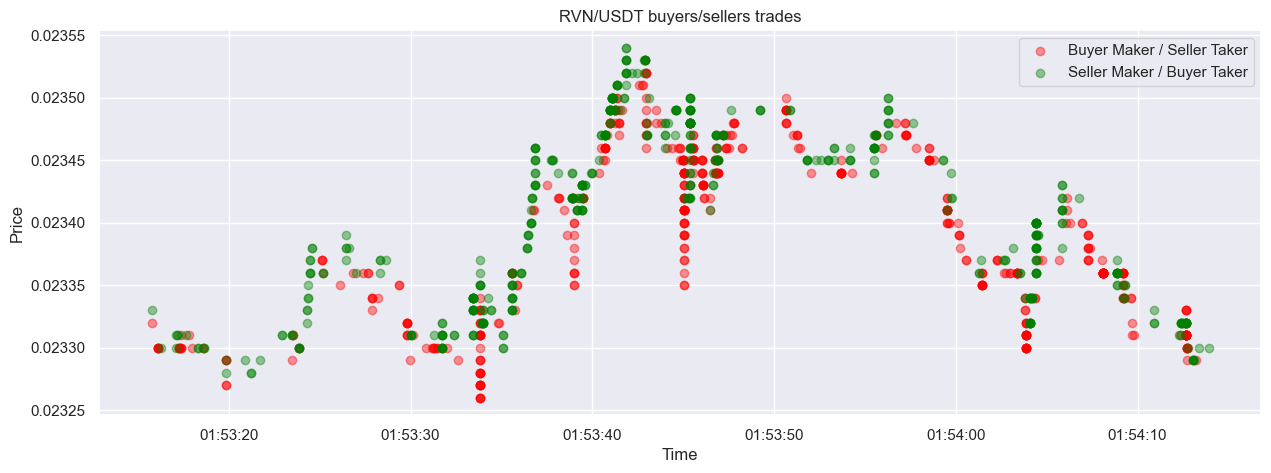

In [20]:
# Figure 5
start = rvn_usdt.index[rvn_usdt.index >= "2023-07-01 01:53:15.745"][0]
end   = rvn_usdt.index[rvn_usdt.index <= "2023-07-01 01:54:15.745"][-1]

rvn_usdt_slice = rvn_usdt.loc[start:end] # Slice the data

fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(x = rvn_usdt_slice[rvn_usdt_slice['is_buyer_maker'] == True].index, \
           y = rvn_usdt_slice[rvn_usdt_slice['is_buyer_maker'] == True]['price'], color='red', \
            label='Buyer Maker / Seller Taker', alpha = 0.4) # Plot the buyer maker / seller taker
ax.scatter(x = rvn_usdt_slice[rvn_usdt_slice['is_buyer_maker'] == False].index, \
           y = rvn_usdt_slice[rvn_usdt_slice['is_buyer_maker'] == False]['price'], color='green', \
            label='Seller Maker / Buyer Taker', alpha = 0.4) # Plot the seller maker / buyer taker
ax.set_title("RVN/USDT buyers/sellers trades")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.legend()
plt.show()

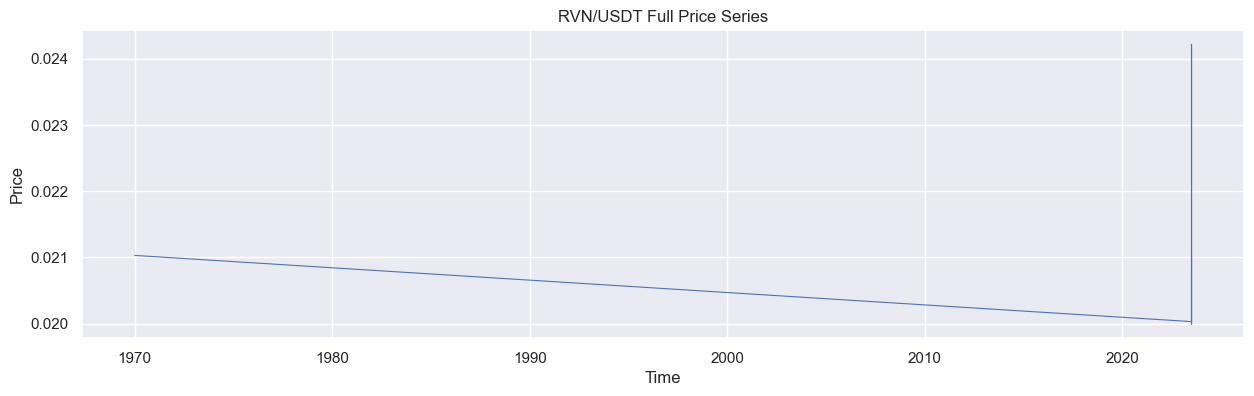

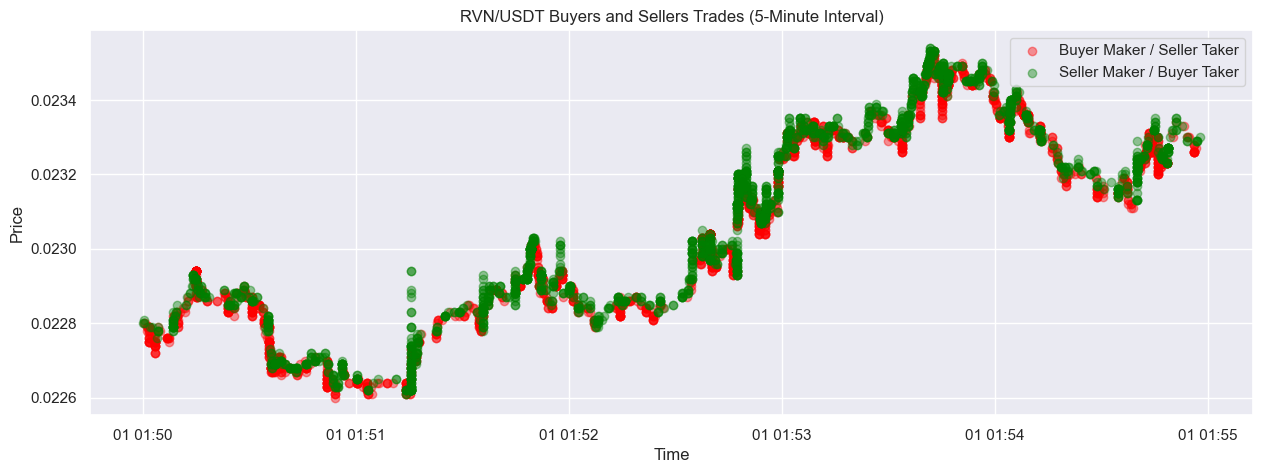

'Exercise 4 (Optional)\n\nUsing the code provided in this notebook as a guide, download the tick data locally in order to \ncontinue your workflow on your own PC. Then, try to use plotly or bokeh (holoviews) in order to \ncreate the interactive plots that will let you zoom in without slicing the dataset every time you \nwant to create a new graph. Check here for the gallery provided by plotly, and make sure you understand\nthe difference between an interactive plot and a static one.'

In [ ]:
'''Exercise 3

In Figure 5, we can see a zoomed-in graph of the RVN/USDT buyers' and sellers' trades. 
The interval chosen is exactly 1 minute. In this exercise, you must recreate Figure 5 for 
different intervals. You can choose larger intervals and/or different points in time. 
In order to have a guide in choosing the intervals that interest you, you will have to plot 
the entire price plot of the RVN/USDT pair.'''

# ===================== IMPORTS =====================
import pandas as pd
import matplotlib.pyplot as plt

# ===================== SAFETY CHECK =====================
# Ensure datetime index
rvn_usdt.index = pd.to_datetime(rvn_usdt.index)

# ===================== FULL PRICE SERIES (GUIDE PLOT) =====================
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(rvn_usdt.index, rvn_usdt['price'], linewidth=0.8)
ax.set_title("RVN/USDT Full Price Series")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
plt.show()

# ===================== SELECT DIFFERENT INTERVAL =====================
start = rvn_usdt.index[rvn_usdt.index >= "2023-07-01 01:50:00"][0]
end   = rvn_usdt.index[rvn_usdt.index <= "2023-07-01 01:55:00"][-1]

rvn_usdt_slice = rvn_usdt.loc[start:end]

# ===================== SAFE BOOLEAN MASKS =====================
buyer_maker  = rvn_usdt_slice['is_buyer_maker'] == True
seller_maker = rvn_usdt_slice['is_buyer_maker'] == False

# ===================== FIGURE 5 RECREATION =====================
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(
    rvn_usdt_slice[buyer_maker].index,
    rvn_usdt_slice[buyer_maker]['price'],
    color='red',
    alpha=0.4,
    label='Buyer Maker / Seller Taker'
)

ax.scatter(
    rvn_usdt_slice[seller_maker].index,
    rvn_usdt_slice[seller_maker]['price'],
    color='green',
    alpha=0.4,
    label='Seller Maker / Buyer Taker'
)

ax.set_title("RVN/USDT Buyers and Sellers Trades (5-Minute Interval)")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.legend()
plt.show()




In [27]:
'''Exercise 4 (Optional)

Using the code provided in this notebook as a guide, download the tick data locally in order to 
continue your workflow on your own PC. Then, try to use plotly or bokeh (holoviews) in order to 
create the interactive plots that will let you zoom in without slicing the dataset every time you 
want to create a new graph. Check here for the gallery provided by plotly, and make sure you understand
the difference between an interactive plot and a static one.'''

# ===================== SAVE DATA LOCALLY =====================
rvn_usdt.to_csv("RVN_USDT_ticks.csv")

# ===================== INTERACTIVE PLOT =====================
import plotly.express as px

fig = px.scatter(
    rvn_usdt,
    x=rvn_usdt.index,
    y="price",
    color="is_buyer_maker",
    opacity=0.5,
    title="RVN/USDT Tick Trades (Interactive Zoom)",
    labels={"x": "Time", "price": "Price"}
)

fig.update_traces(marker=dict(size=4))
fig.show()


In [28]:
# Load the data, dataset (3) - AGLJ_J
columns = ['RIC', 'DateTimeL', 'Type', 'Price', 'Volume', 'L1 Bid', 'L1 Ask', 'Trade Sign']
aglj = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\L3\\AGLJ_J_04-Jan-2016_TO_10-May-2016_5days.csv", \
                   names = columns, skiprows = 1) # Load the data
aglj.sort_values(by = 'DateTimeL', inplace = True)
aglj.head(5)

RIC      DateTimeL    Type   Price  Volume  L1 Bid  L1 Ask  Trade Sign
0   AGLJ.J  736333.382013   Trade  6750.0   366.0     0.0     0.0         0.0
1   AGLJ.J  736333.382013   Quote     0.0     0.0     0.0  6800.0         0.0
2   AGLJ.J  736333.382015   Trade  6750.0   374.0     0.0     0.0         0.0
3   AGLJ.J  736333.382015   Quote     0.0     0.0     0.0  6800.0         0.0
4   AGLJ.J  736333.382015   Quote     0.0     0.0  6735.0  6800.0         0.0

In [29]:
from datetime import datetime, timedelta

def convert_serial_to_datetime(serial):
    # Define the base date as January 1, 0001
    base_date = datetime(1, 1, 1)

    # Split the serial date into days and fractional days
    days = int(serial)
    fractional_day = serial - days

    # Adjust for the lack of year 0 by subtracting 367 days
    adjusted_days = days - 367

    # Calculate the target date by adding the adjusted days and fractional day (converted to seconds) to the base date
    target_date = base_date + timedelta(days=adjusted_days) + timedelta(seconds=fractional_day * 86400)

    # Return the target date in human-readable format
    return target_date.strftime('%Y-%m-%d %H:%M:%S')

aglj['timestamp'] = aglj['DateTimeL'].apply(convert_serial_to_datetime) # Convert the serial date to human readable datetime
aglj['timestamp'] = pd.to_datetime(aglj['timestamp']) # Convert the timestamp to datetime object
aglj.set_index('timestamp', inplace=True) # Set the timestamp as the index
aglj.head(5)

RIC      DateTimeL    Type   Price  Volume  L1 Bid  \
timestamp                                                                     
2016-01-04 09:10:05   AGLJ.J  736333.382013   Trade  6750.0   366.0     0.0   
2016-01-04 09:10:05   AGLJ.J  736333.382013   Quote     0.0     0.0     0.0   
2016-01-04 09:10:06   AGLJ.J  736333.382015   Trade  6750.0   374.0     0.0   
2016-01-04 09:10:06   AGLJ.J  736333.382015   Quote     0.0     0.0     0.0   
2016-01-04 09:10:06   AGLJ.J  736333.382015   Quote     0.0     0.0  6735.0   

                     L1 Ask  Trade Sign  
timestamp                                
2016-01-04 09:10:05     0.0         0.0  
2016-01-04 09:10:05  6800.0         0.0  
2016-01-04 09:10:06     0.0         0.0  
2016-01-04 09:10:06  6800.0         0.0  
2016-01-04 09:10:06  6800.0         0.0

In [31]:
# Delete entries with a quote or transaction price equal to zero or being negative
prices = aglj[aglj['Type'] == ' Trade']['Price']
quotes = aglj[aglj['Type'] == ' Quote'][['L1 Bid', 'L1 Ask']]
print("Number of entries with a transaction price equal to zero or negative: ", (prices <= 0).sum())
print("Number of entries with negative or zero volume: ", (aglj[aglj['Type'] == ' Trade']['Volume'] <= 0).sum())
print("Number of entries with a quote equal to zero or negative: ", (quotes <= 0).sum().sum())
index_to_drop_quotes = quotes[quotes['L1 Ask'] <= 0].index.union(quotes[quotes['L1 Bid'] <= 0].index)
aglj.drop(index=index_to_drop_quotes, inplace=True)

# Delete entries with a negative spread
spreads = aglj[aglj['Type'] == ' Quote']['L1 Ask'] - aglj[aglj['Type'] == ' Quote']['L1 Bid']
index_to_drop_spreads = spreads[spreads < 0].index
print("Number of entries with a negative spread: ", len(index_to_drop_spreads))
aglj.drop(index=index_to_drop_spreads, inplace=True)

# Dealing with split transactions
dataset_on_trades = aglj[aglj['Type'] == ' Trade'].copy()

grouped_trades = dataset_on_trades.groupby('DateTimeL')
unique_trades = pd.DataFrame({
    'DateTimeL': grouped_trades['DateTimeL'].first(),
    'Volume': grouped_trades['Volume'].sum(),
    'Price': (dataset_on_trades['Price'] * dataset_on_trades['Volume']).groupby(dataset_on_trades['DateTimeL']).sum() / grouped_trades['Volume'].sum(),
    'L1 Bid': 0.0,  # Keep the structure consistent
    'L1 Ask': 0.0,  # Keep the structure consistent
    'Type': ' Trade'
})

# Get the last trade sign for each grouped timestamp
trade_signs = dataset_on_trades.groupby('DateTimeL')['Trade Sign'].last()
unique_trades['Trade Sign'] = unique_trades['DateTimeL'].map(trade_signs)

# Dealing with intra-second quotes
dataset_on_quotes = aglj[aglj['Type'] == ' Quote'].copy()

unique_quotes = pd.DataFrame({
    'DateTimeL': dataset_on_quotes.groupby('DateTimeL')['DateTimeL'].last(),
    'Volume': 0.0,  # Keep the structure consistent
    'Price': 0.0,   # Keep the structure consistent
    'L1 Bid': dataset_on_quotes.groupby('DateTimeL')['L1 Bid'].last(),
    'L1 Ask': dataset_on_quotes.groupby('DateTimeL')['L1 Ask'].last(),
    'Type': ' Quote',
    'Trade Sign': 0.0  # or np.nan if you prefer
})

# Concatenate instead of merge (since we're keeping all columns)
aggr_dataset_2 = pd.concat([unique_trades, unique_quotes], ignore_index=True)

# Sort by DateTimeL
aggr_dataset_2 = aggr_dataset_2.sort_values('DateTimeL').reset_index(drop=True)

# Set index and convert to datetime
aggr_dataset_2.set_index('DateTimeL', inplace=True)
aggr_dataset_2.index = pd.to_datetime(aggr_dataset_2.index.map(convert_serial_to_datetime))
aggr_dataset_2.index.name = 'DateTimeL'

aggr_dataset_2.head(5)

Number of entries with a transaction price equal to zero or negative:  0
Number of entries with negative or zero volume:  0
Number of entries with a quote equal to zero or negative:  0
Number of entries with a negative spread:  0


Volume  Price  L1 Bid  L1 Ask    Type  Trade Sign
DateTimeL                                                             
2016-01-04 09:10:20     0.0    0.0  6751.0  6800.0   Quote         0.0
2016-01-04 09:10:20     0.0    0.0  6751.0  6800.0   Quote         0.0
2016-01-04 09:10:21     0.0    0.0  6755.0  6800.0   Quote         0.0
2016-01-04 09:10:21     0.0    0.0  6757.0  6800.0   Quote         0.0
2016-01-04 09:10:42     0.0    0.0  6759.0  6800.0   Quote         0.0

In [32]:
# A significant decrease in the number of rows
print(f"The filtered dataset `aggr_dataset_2` has {len(aggr_dataset_2)} entries, while the `aglj` dataset had {len(aglj)}.")

The filtered dataset `aggr_dataset_2` has 109579 entries, while the `aglj` dataset had 138477.


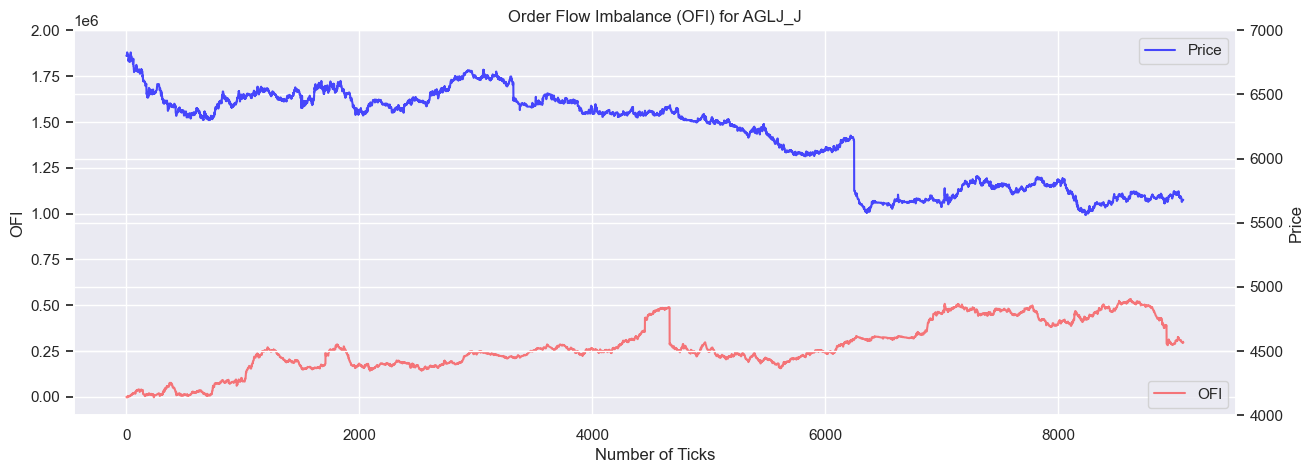

Pearson correlation between Price and OFI: -0.73339353912804

Spearman correlation between Price and OFI: -0.6821905839040272
Spearman p-value: 0.0

Kendall correlation between Price and OFI: -0.45044643924152344
Kendall p-value: 0.0


In [34]:
#Exercise 5

'''Import the library scipy and compute the Spearman and Kendall correlation between the price and OFI. 
What do you see? Was that result what you expected?'''

# Figure 6
# ===================== IMPORTS =====================
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau

# ===================== OFI CONSTRUCTION =====================
# Select only trades
trades = aggr_dataset_2[aggr_dataset_2['Type'] == ' Trade']

# Signed volume (Order Flow Imbalance per trade)
signed_volume = trades['Volume'] * trades['Trade Sign']

# Cumulative OFI
ofi = signed_volume.cumsum()

# Prices
prices = trades['Price']

# ===================== PLOT (FIGURE 6) =====================
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(
    np.arange(len(ofi)),
    ofi,
    label='OFI',
    color='red',
    alpha=0.5
)

ax.set_ylabel('OFI')
ax.set_xlabel('Number of Ticks')
ax.set_title('Order Flow Imbalance (OFI) for AGLJ_J')
ax.set_ylim(-100000, 2000000)
ax.legend(loc='lower right')

ax2 = ax.twinx()
ax2.plot(
    np.arange(len(prices)),
    prices,
    color='blue',
    label='Price',
    alpha=0.7
)

ax2.set_ylabel('Price')
ax2.set_ylim(4000, 7000)
ax2.legend()

plt.show()

# ===================== CLEAN DATA FOR CORRELATION =====================
valid_idx = (~prices.isna()) & (~ofi.isna())

prices_clean = prices[valid_idx]
ofi_clean = ofi[valid_idx]

# ===================== CORRELATIONS =====================
# Pearson
pearson_corr = np.corrcoef(prices_clean, ofi_clean)[0, 1]

# Spearman
spearman_corr, spearman_p = spearmanr(prices_clean, ofi_clean)

# Kendall
kendall_corr, kendall_p = kendalltau(prices_clean, ofi_clean)

# ===================== PRINT RESULTS =====================
print("Pearson correlation between Price and OFI:", pearson_corr)
print("\nSpearman correlation between Price and OFI:", spearman_corr)
print("Spearman p-value:", spearman_p)

print("\nKendall correlation between Price and OFI:", kendall_corr)
print("Kendall p-value:", kendall_p)


In [ ]:
#Exercise 6

'''We deliberately gave a definition for buying and selling volume: Buying/Selling volume is the volume 
of the trades that were initiated by buyers/sellers (as takers). But now we must think of the buying and 
selling volume from the perspective of the trader's intention, which is the actual buying and selling volumes.

Hint: If a trader wants to buy, they can place a market order or a limit order.

Initiate a discussion in the forum with your ideas.'''



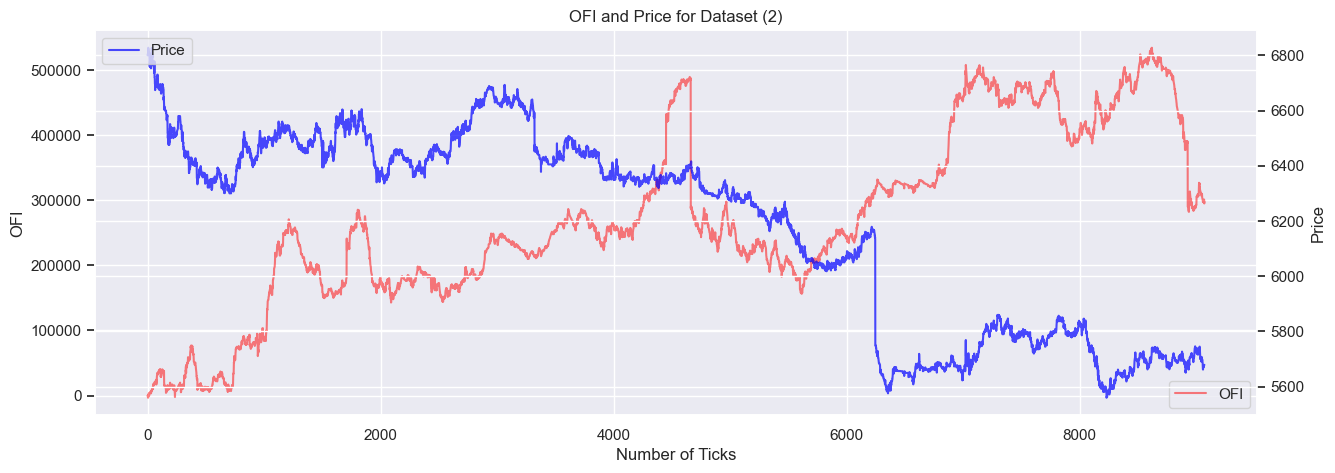

In [35]:
#Exercise 7

'''We observed a counterintuitive result concerning the OFI of dataset (3): falling price with rising OFI. 
Now calculate the OFI for dataset (2) and plot it along with the price on the same graph (dual 
-axis). What do you see?

Let's now provide ideas for plotting the best bid and ask along with the price of AGLJ: we will use the 
step function for the quote levels and the scatter for the price.'''

#PART A — Compute OFI for dataset (2)
import numpy as np
import matplotlib.pyplot as plt

# Select trades only
trades_2 = aggr_dataset_2[aggr_dataset_2['Type'] == ' Trade']

# Signed volume
signed_volume_2 = trades_2['Volume'] * trades_2['Trade Sign']

# Cumulative OFI
ofi_2 = signed_volume_2.cumsum()

# Prices
prices_2 = trades_2['Price']

#PART B — Plot OFI and Price together (dual axis)
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(
    np.arange(len(ofi_2)),
    ofi_2,
    color='red',
    alpha=0.5,
    label='OFI'
)
ax.set_ylabel('OFI')
ax.set_xlabel('Number of Ticks')
ax.legend(loc='lower right')

ax2 = ax.twinx()
ax2.plot(
    np.arange(len(prices_2)),
    prices_2,
    color='blue',
    alpha=0.7,
    label='Price'
)
ax2.set_ylabel('Price')
ax2.legend(loc='upper left')

ax.set_title('OFI and Price for Dataset (2)')
plt.show()

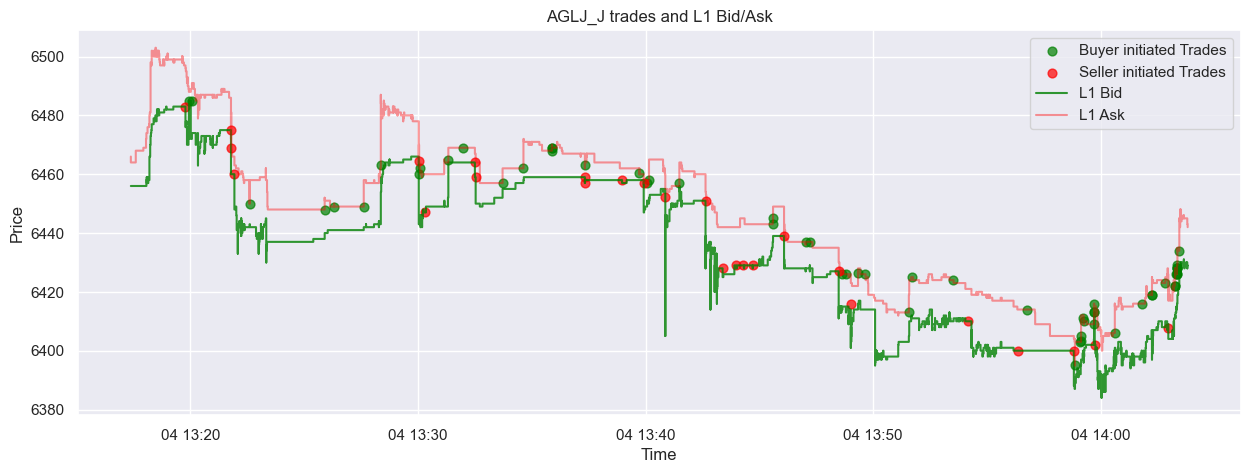

In [36]:
# Figure 7

zoomed_in_quotes_price = aggr_dataset_2.loc['2016-01-04'].iloc[15000:17000, :] # Slice the data

fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(x = zoomed_in_quotes_price[(zoomed_in_quotes_price['Type'] == ' Trade') & (zoomed_in_quotes_price['Trade Sign'] == 1)].index, \
              y = zoomed_in_quotes_price[(zoomed_in_quotes_price['Type'] == ' Trade') & (zoomed_in_quotes_price['Trade Sign'] == 1)]['Price'], color='green', \
                label='Buyer initiated Trades', alpha = 0.7, s = 40) # Plot the trades
ax.scatter(x = zoomed_in_quotes_price[(zoomed_in_quotes_price['Type'] == ' Trade') & (zoomed_in_quotes_price['Trade Sign'] == -1)].index, \
              y = zoomed_in_quotes_price[(zoomed_in_quotes_price['Type'] == ' Trade') & (zoomed_in_quotes_price['Trade Sign'] == -1)]['Price'], color='red', \
                label='Seller initiated Trades', alpha = 0.7, s = 40) # Plot the trades
ax.step(zoomed_in_quotes_price[zoomed_in_quotes_price['Type'] == ' Quote'].index, \
                zoomed_in_quotes_price[zoomed_in_quotes_price['Type'] == ' Quote']['L1 Bid'], color='green', \
                    label='L1 Bid', alpha = 0.8, where = 'post') # Plot the L1 Bid
ax.step(zoomed_in_quotes_price[zoomed_in_quotes_price['Type'] == ' Quote'].index, \
                zoomed_in_quotes_price[zoomed_in_quotes_price['Type'] == ' Quote']['L1 Ask'], color='red', \
                    label='L1 Ask', alpha = 0.4, where = 'post') # Plot the L1 Ask

ax.set_title("AGLJ_J trades and L1 Bid/Ask")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.legend()
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.



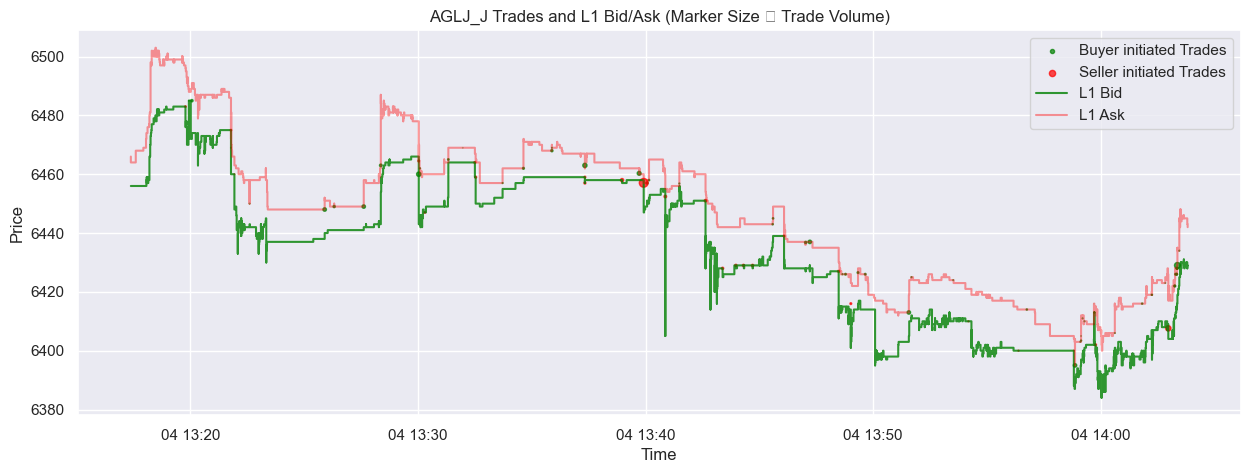

In [37]:
#Exercise 8

'''In Figure 7, you can see the plot of the best quotes plotted along the price. Do the following:

Be certain you can explain the argument where = 'post' inside the step plot function.
By checking the matplotlib documentation, enhance the above graph by adjusting the size 
of the scatter marker using the size of the trade. So, if trade A is larger than trade B, 
then marker A should be larger than marker B. You can choose a different date and slice of the dataset. 
Paste your results in the forum.'''

import matplotlib.pyplot as plt
import numpy as np

# ------------------ SLICE DATA (YOU MAY CHANGE THIS) ------------------
zoomed = aggr_dataset_2.loc['2016-01-04'].iloc[15000:17000, :]

# ------------------ TRADE FILTERS ------------------
buy_trades = (zoomed['Type'] == ' Trade') & (zoomed['Trade Sign'] == 1)
sell_trades = (zoomed['Type'] == ' Trade') & (zoomed['Trade Sign'] == -1)
quotes = zoomed['Type'] == ' Quote'

# ------------------ SCALE TRADE SIZE FOR MARKERS ------------------
# Normalize volume to reasonable marker sizes
volume = zoomed['Volume']
marker_size = 40 * (volume / volume.max())

# ------------------ PLOT ------------------
fig, ax = plt.subplots(figsize=(15, 5))

# Buyer-initiated trades
ax.scatter(
    zoomed[buy_trades].index,
    zoomed[buy_trades]['Price'],
    s=marker_size[buy_trades],
    color='green',
    alpha=0.7,
    label='Buyer initiated Trades'
)

# Seller-initiated trades
ax.scatter(
    zoomed[sell_trades].index,
    zoomed[sell_trades]['Price'],
    s=marker_size[sell_trades],
    color='red',
    alpha=0.7,
    label='Seller initiated Trades'
)

# Best Bid (step plot)
ax.step(
    zoomed[quotes].index,
    zoomed[quotes]['L1 Bid'],
    where='post',
    color='green',
    alpha=0.8,
    label='L1 Bid'
)

# Best Ask (step plot)
ax.step(
    zoomed[quotes].index,
    zoomed[quotes]['L1 Ask'],
    where='post',
    color='red',
    alpha=0.4,
    label='L1 Ask'
)

# ------------------ LABELS ------------------
ax.set_title("AGLJ_J Trades and L1 Bid/Ask (Marker Size ∝ Trade Volume)")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.legend()

plt.show()


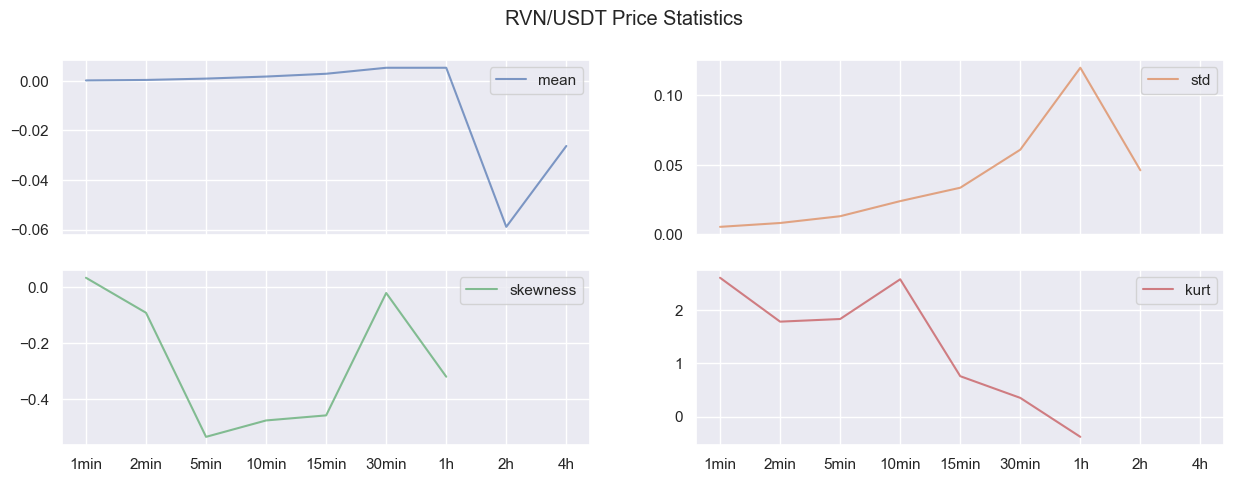

In [39]:
#Create the resample function
def calculate_statistics(df: pd.DataFrame, freq: str) -> dict:
    """
    Calculate statistics for a single timeframe without storing intermediate data.
    """
    # Only resample the close prices (not OHLC)
    resampled_close = df['price'].resample(freq, label='right').last()
    
    # Calculate log returns
    log_returns = np.log(resampled_close / resampled_close.shift(1)).dropna()
    
    # Calculate and return statistics immediately
    stats = {
        'mean': log_returns.mean(),
        'std': log_returns.std(),
        'skewness': log_returns.skew(),
        'kurt': log_returns.kurt()
    }
    
    # Memory is freed automatically when function returns
    return stats

# Process one timeframe at a time
timeframes = ['1min', '2min', '5min', '10min', '15min', '30min', '1h', '2h', '4h', '8h', '12h', '1D', '2D', '5D']
statistics = {}

for timeframe in timeframes:
    statistics[timeframe] = calculate_statistics(rvn_usdt, timeframe)
    
#Figure 8
pd.DataFrame(statistics).T.plot(subplots = True, figsize = (15, 5), layout = (2, 2), title = 'RVN/USDT Price Statistics', alpha = 0.7) # Plot the statistics
plt.show()

Index(['price', 'qty', 'UNIX_time', 'is_buyer_maker'], dtype='object')


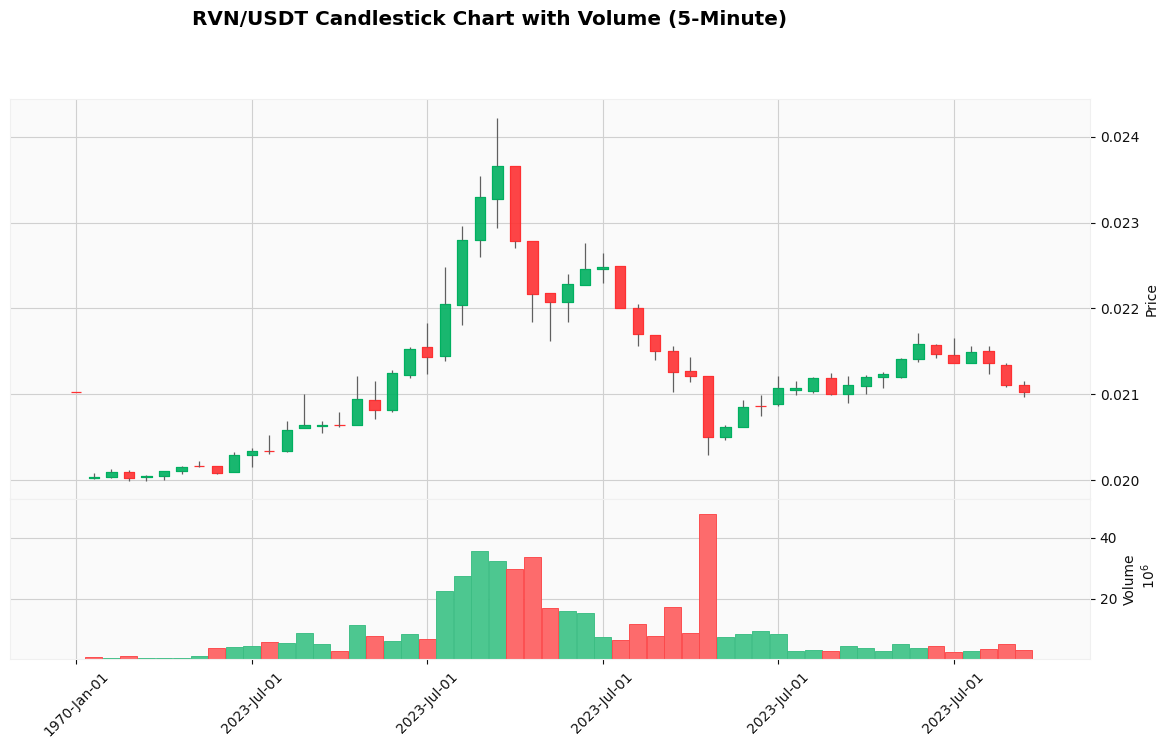

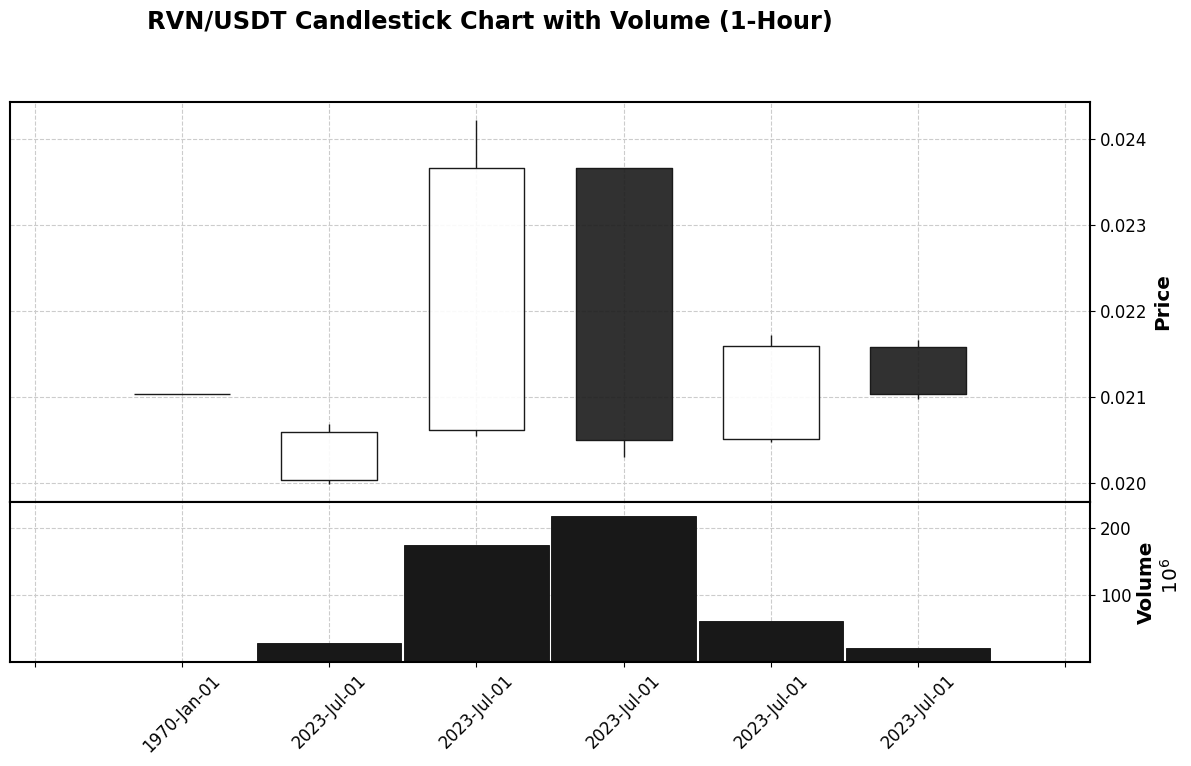

In [43]:
#Exercise 9

'''Explain the argument label = right. Discuss your ideas in the forum. Also, find a suitable 
library to plot the 'candles' along with the volume.'''

# ===================== IMPORTS =====================
import pandas as pd
import numpy as np
import mplfinance as mpf


# ===================== CHECK DATA =====================
print(rvn_usdt.columns)


# ===================== DETECT VOLUME COLUMN =====================
if 'quantity' in rvn_usdt.columns:
    vol_col = 'quantity'
elif 'qty' in rvn_usdt.columns:
    vol_col = 'qty'
elif 'volume' in rvn_usdt.columns:
    vol_col = 'volume'
elif 'quote_qty' in rvn_usdt.columns:
    vol_col = 'quote_qty'
else:
    raise ValueError("No volume column found in rvn_usdt")


# ===================== RESAMPLE TO OHLCV =====================
freq = '5min'

ohlcv = rvn_usdt.resample(
    freq,
    label='right',
    closed='right'
).agg({
    'price': ['first', 'max', 'min', 'last'],
    vol_col: 'sum'
})

# Flatten column names
ohlcv.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Drop empty candles
ohlcv.dropna(inplace=True)


# ===================== CANDLESTICK + VOLUME =====================
mpf.plot(
    ohlcv,
    type='candle',
    volume=True,
    style='yahoo',
    title='RVN/USDT Candlestick Chart with Volume (5-Minute)',
    ylabel='Price',
    ylabel_lower='Volume',
    figsize=(15, 8)
)


# ===================== OPTIONAL: 1-HOUR CANDLES =====================
ohlcv_1h = rvn_usdt.resample(
    '1h',
    label='right',
    closed='right'
).agg({
    'price': ['first', 'max', 'min', 'last'],
    vol_col: 'sum'
})

ohlcv_1h.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
ohlcv_1h.dropna(inplace=True)

mpf.plot(
    ohlcv_1h,
    type='candle',
    volume=True,
    style='classic',
    title='RVN/USDT Candlestick Chart with Volume (1-Hour)',
    ylabel='Price',
    ylabel_lower='Volume',
    figsize=(15, 8)
)


In [44]:
#Exercise 10

'''Create time bars for the rvn_usdt pair as above but now include two more columns:

A column named buying_volume that will consist of the aggregated volume of the trades attributed to the is_buyer_maker = False
A column named selling_volume that will consist of the aggregated volume of the trades attributed to the is_buyer_maker = True'''

import pandas as pd
import numpy as np

# ------------------ Detect volume column ------------------
if 'quantity' in rvn_usdt.columns:
    vol_col = 'quantity'
elif 'qty' in rvn_usdt.columns:
    vol_col = 'qty'
elif 'volume' in rvn_usdt.columns:
    vol_col = 'volume'
else:
    raise ValueError("No volume column found")

# ------------------ Create buying & selling volume columns ------------------
rvn_usdt['buying_volume'] = np.where(
    rvn_usdt['is_buyer_maker'] == False,
    rvn_usdt[vol_col],
    0
)

rvn_usdt['selling_volume'] = np.where(
    rvn_usdt['is_buyer_maker'] == True,
    rvn_usdt[vol_col],
    0
)

# ------------------ Resample to time bars ------------------
freq = '5min'

time_bars = rvn_usdt.resample(
    freq,
    label='right',
    closed='right'
).agg({
    'price': ['first', 'max', 'min', 'last'],
    vol_col: 'sum',
    'buying_volume': 'sum',
    'selling_volume': 'sum'
})

# Flatten columns
time_bars.columns = [
    'Open', 'High', 'Low', 'Close',
    'Total_Volume',
    'Buying_Volume',
    'Selling_Volume'
]

time_bars.dropna(inplace=True)

time_bars.head()



Open     High      Low    Close  Total_Volume  \
timestamp                                                               
1970-01-01 00:05:00  0.02103  0.02103  0.02103  0.02103       10000.0   
2023-07-01 00:05:00  0.02003  0.02009  0.02002  0.02004      692170.5   
2023-07-01 00:10:00  0.02004  0.02013  0.02003  0.02010      600121.9   
2023-07-01 00:15:00  0.02010  0.02012  0.01999  0.02003     1211628.3   
2023-07-01 00:20:00  0.02004  0.02006  0.01999  0.02005      333173.1   

                     Buying_Volume  Selling_Volume  
timestamp                                           
1970-01-01 00:05:00            0.0             0.0  
2023-07-01 00:05:00       400985.5        291185.0  
2023-07-01 00:10:00       281769.8        318352.1  
2023-07-01 00:15:00       296880.3        914748.0  
2023-07-01 00:20:00       145510.9        187662.2

In [46]:
#Exercise 11

'''In explaining the statistics of Figure 8, we used the central limit theorem to argue for the convergence 
of the returns distribution with the normal distribution. But we did not actually aggregate the returns. 
Rather, we used the close column of each timeframe to calculate the kurtosis. Is that argument used correctly 
or not? Why? Do the same as above but instead of the close price of each timeframe, calculate the sum() 
of the log returns. Does this change anything?'''

# ------------------ Compute tick log returns ------------------
rvn_usdt['log_return'] = np.log(rvn_usdt['price'] / rvn_usdt['price'].shift(1))
rvn_usdt.dropna(inplace=True)

# ------------------ Aggregate returns by SUM ------------------
timeframes = ['1min', '5min', '15min', '30min', '1h']
stats_correct = {}

for tf in timeframes:
    aggregated_returns = rvn_usdt['log_return'].resample(
        tf,
        label='right',
        closed='right'
    ).sum().dropna()
    
    stats_correct[tf] = {
        'mean': aggregated_returns.mean(),
        'std': aggregated_returns.std(),
        'skewness': aggregated_returns.skew(),
        'kurtosis': aggregated_returns.kurt()
    }

stats_correct_df = pd.DataFrame(stats_correct).T
stats_correct_df


mean       std  skewness   kurtosis
1min   1.374929e-16  0.006136 -1.617007  13.773068
5min   6.865489e-16  0.014595 -0.930617   2.443632
15min  2.062201e-15  0.034779 -0.321502   0.136095
30min  4.125943e-15  0.059184  0.242030   0.198663
1h     7.421147e-15  0.104510 -0.054934   0.417679